In [ ]:
!pip install mplsoccer
!pip install pitch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from scipy import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 6.0 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.7-py3-none-any.whl size=63806 sha256=dbf4a2e67877bdb8218633814606acab777de29c0a463c180e9225f551264a0e
  Stored in directory: /root/.cache/pip/wheels/54/2d/a2/c9b9f319ead90ccd73208a11e426f5fc410e221e802670b6d5
Successfully built mplsoccer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter team ID::65
Enter player ID::23
Enter value::1


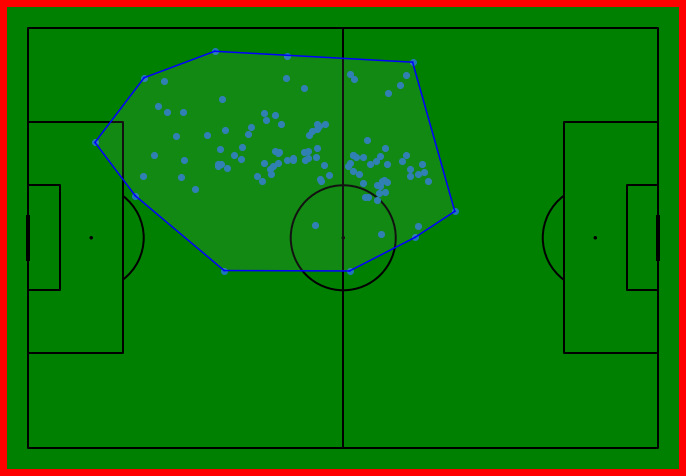

In [ ]:
teamId = int(input("Enter team ID::"))
playerId = int(input("Enter player ID::"))
value = int(input("Enter value::"))

df = pd.read_csv('/content/convexhull.csv')
df = df.fillna(0)

#convert the x and y values to the size of the pitch we will use (120,80)
df['y'] = .8*df['y']
df['x'] = 1.2*df['x']

#filter for the team we want and reset the index so that we can use for loops over it
df = df[df['teamId']==teamId].reset_index()

#the player ids are technically floats so we want to change those to ints
df['playerId'] = df['playerId'].astype(int) 



#A single player

#set up the pitch
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('red')
ax.patch.set_facecolor('red')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='green', line_color='black', figsize=(13, 8))

pitch.draw(ax=ax)
plt.gca().invert_yaxis()
#Create a new data frame for the player and filter for only passes
df1 = df[df["playerId"]==playerId]
df1 = df1[df1['type/value']==value]


#Create an array of the x/y coordinate groups
points = df1[['x', 'y']].values

#Create the convex hull
hull = ConvexHull(df1[['x','y']])

#plot the pass locations
plt.scatter(df1.x,df1.y)

#Loop through each of the hull's simplices
for i in hull.simplices:
    #Draw a line between each
    plt.plot(points[i, 0], points[i, 1], 'blue')
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.01)




In [ ]:
123